 ### <b>What is Support Vector Machine?</b>
- The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

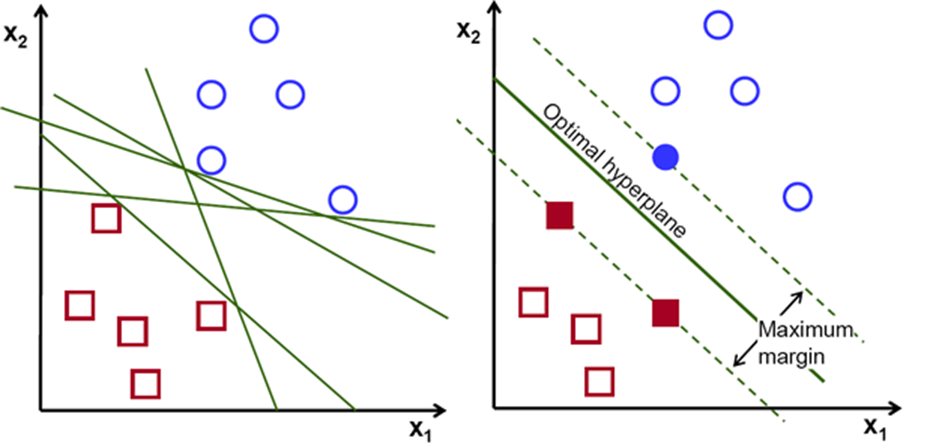 
- To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.
Hyperplanes and Support Vectors Hyperplanes are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes. Also, the dimension of the hyperplane depends upon the number of features. If the number of input features is 2, then the hyperplane is just a line. If the number of input features is 3, then the hyperplane becomes a two-dimensional plane. It becomes difficult to imagine when the number of features exceeds 3.

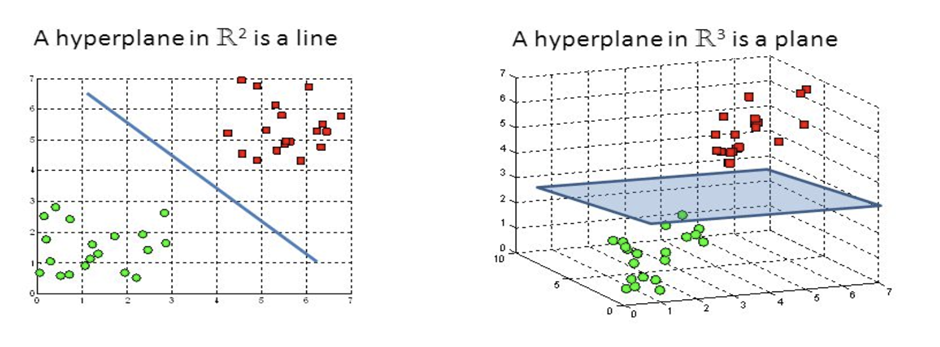
 
- Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane. These are the points that help us build our SVM.

- <B><U>Large Margin Intuition:-</U></B>
In logistic regression, we take the output of the linear function and squash the value within the range of [0,1] using the sigmoid function. If the squashed value is greater than a threshold value(0.5) we assign it a label 1, else we assign it a label 0. In SVM, we take the output of the linear function and if that output is greater than 1, we identify it with one class and if the output is -1, we identify is with another class. Since the threshold values are changed to 1 and -1 in SVM, we obtain this reinforcement range of values([-1,1]) which acts as margin.





In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer=load_breast_cancer()
col_names = list(cancer.feature_names)
col_names.append('target')
df = pd.DataFrame(np.c_[cancer.data, cancer.target], columns=col_names)
df.shape


(569, 31)

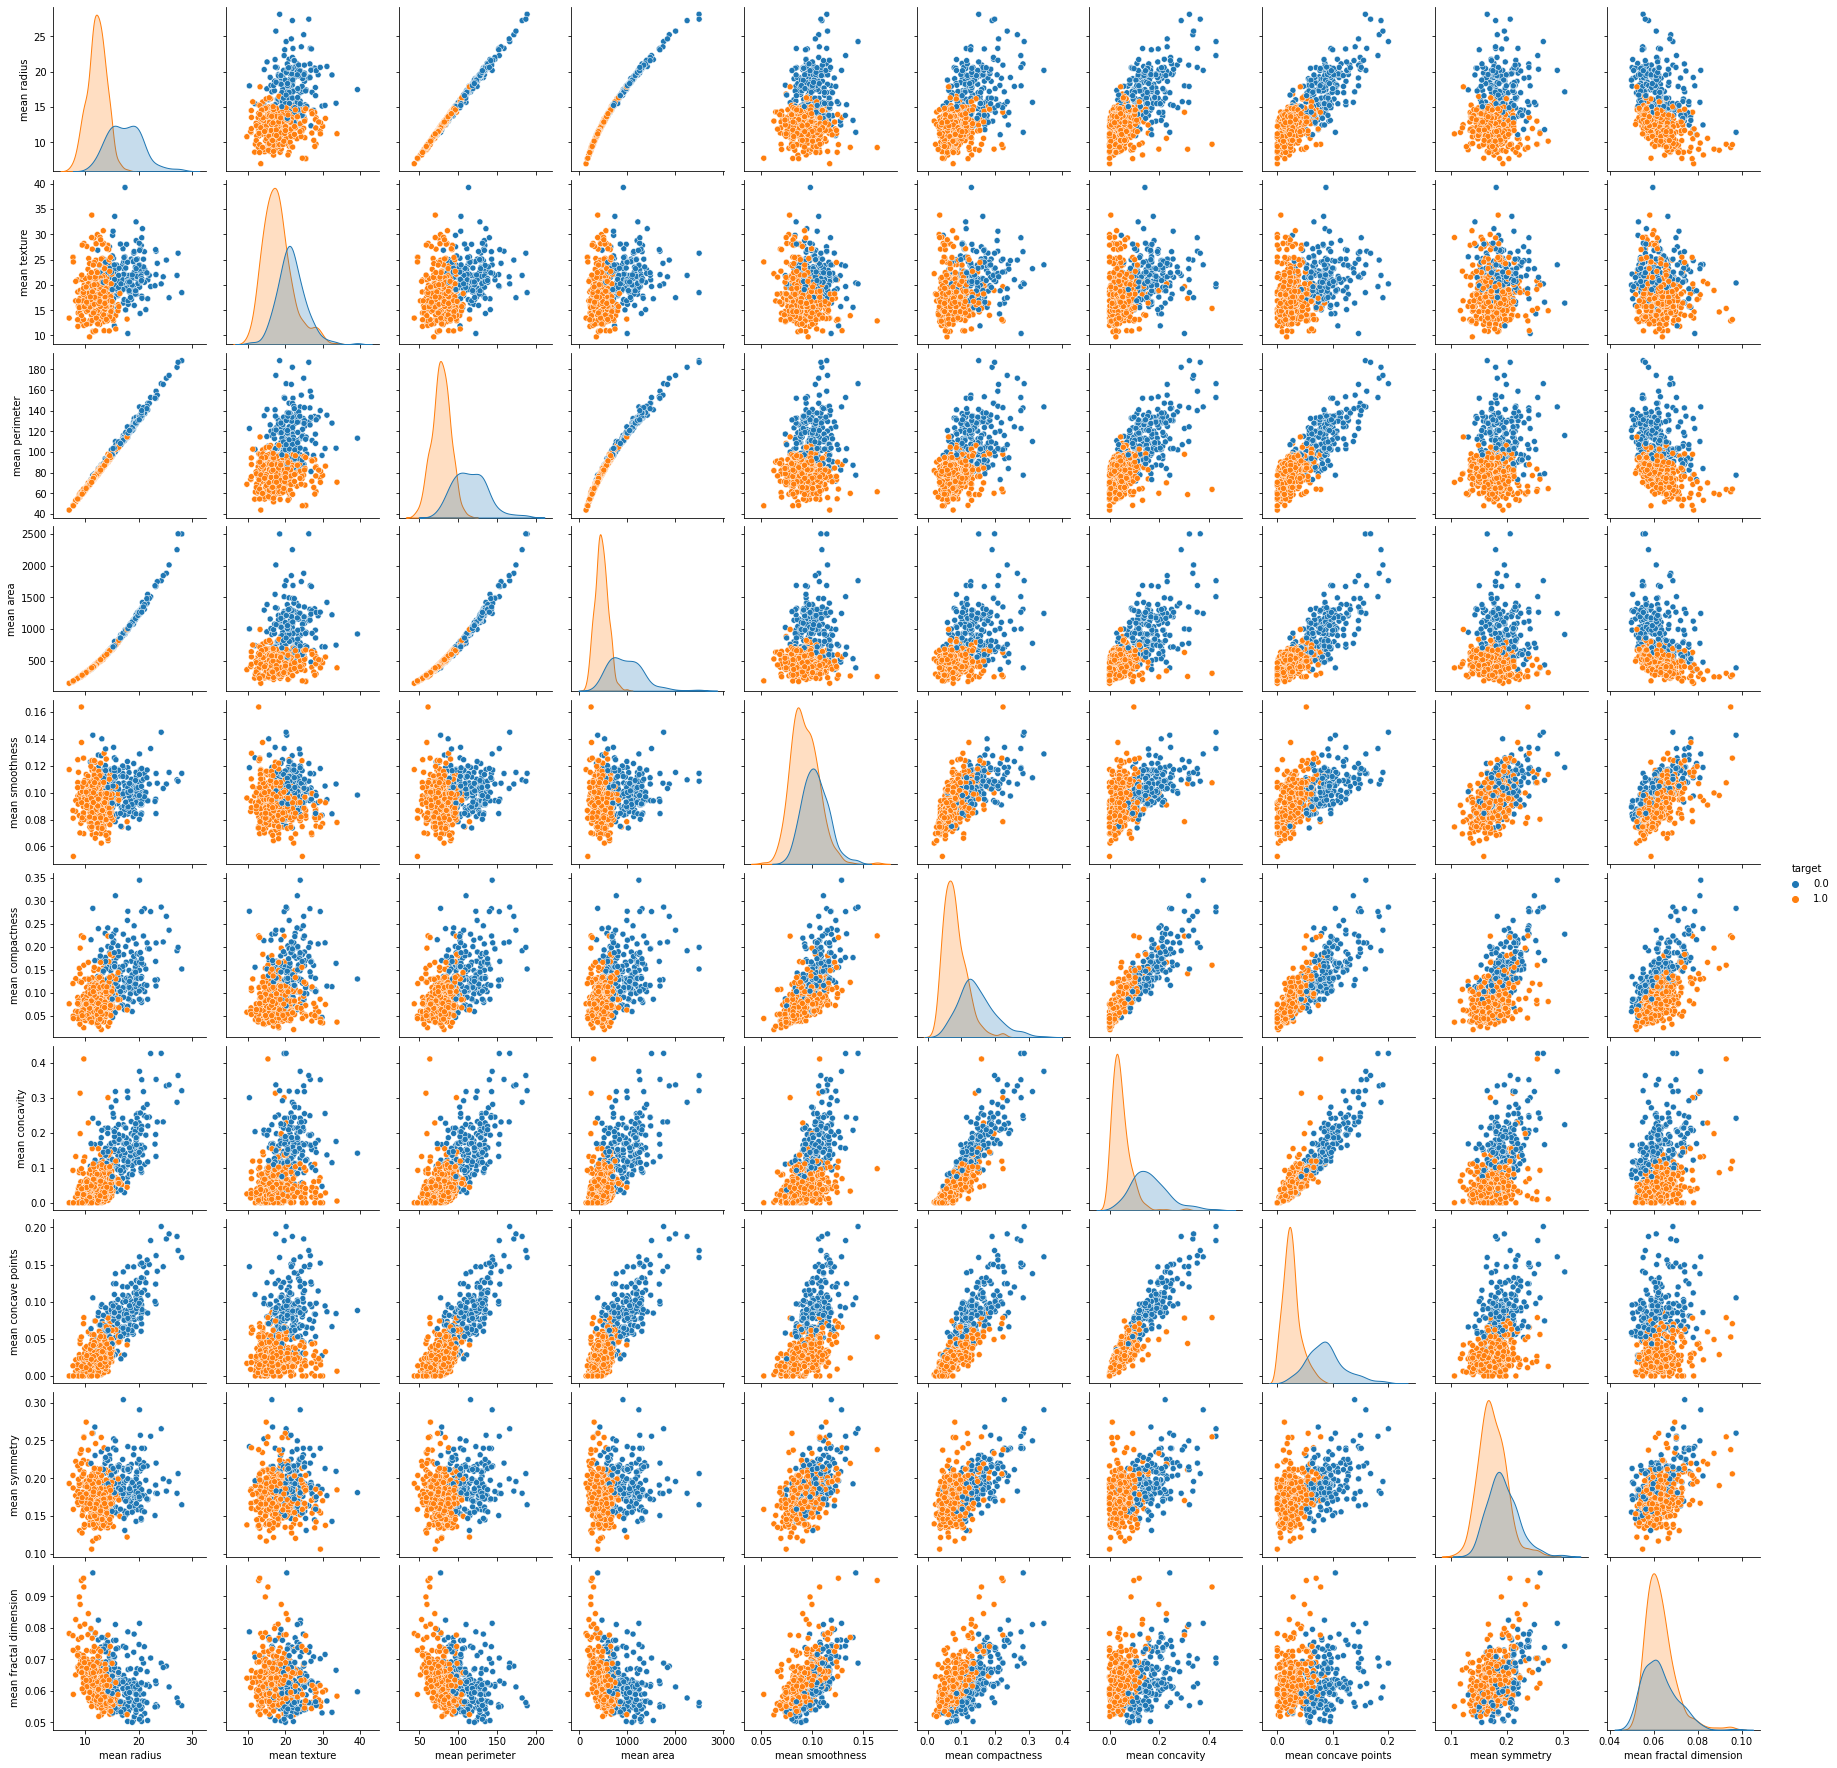

In [ ]:
sns.pairplot(df, hue='target', vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area', 
                                     'mean smoothness', 'mean compactness', 'mean concavity',
                                     'mean concave points', 'mean symmetry', 'mean fractal dimension'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



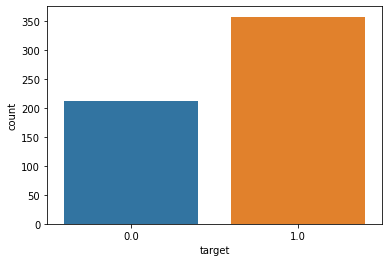

In [ ]:
sns.countplot(df['target'], label = "Count")

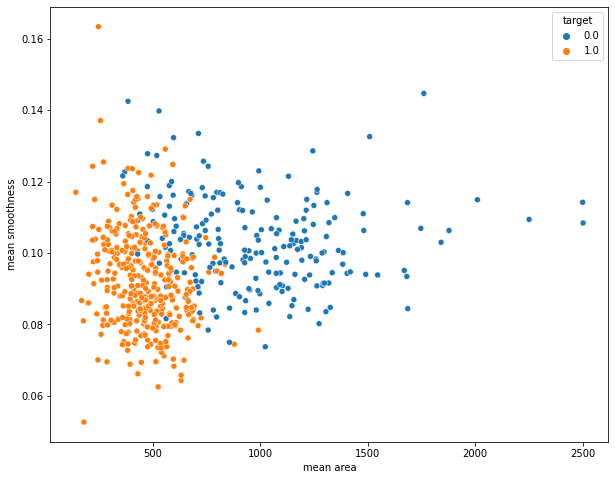

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'mean area', y = 'mean smoothness', hue = 'target', data = df)

(31.5, -0.5)

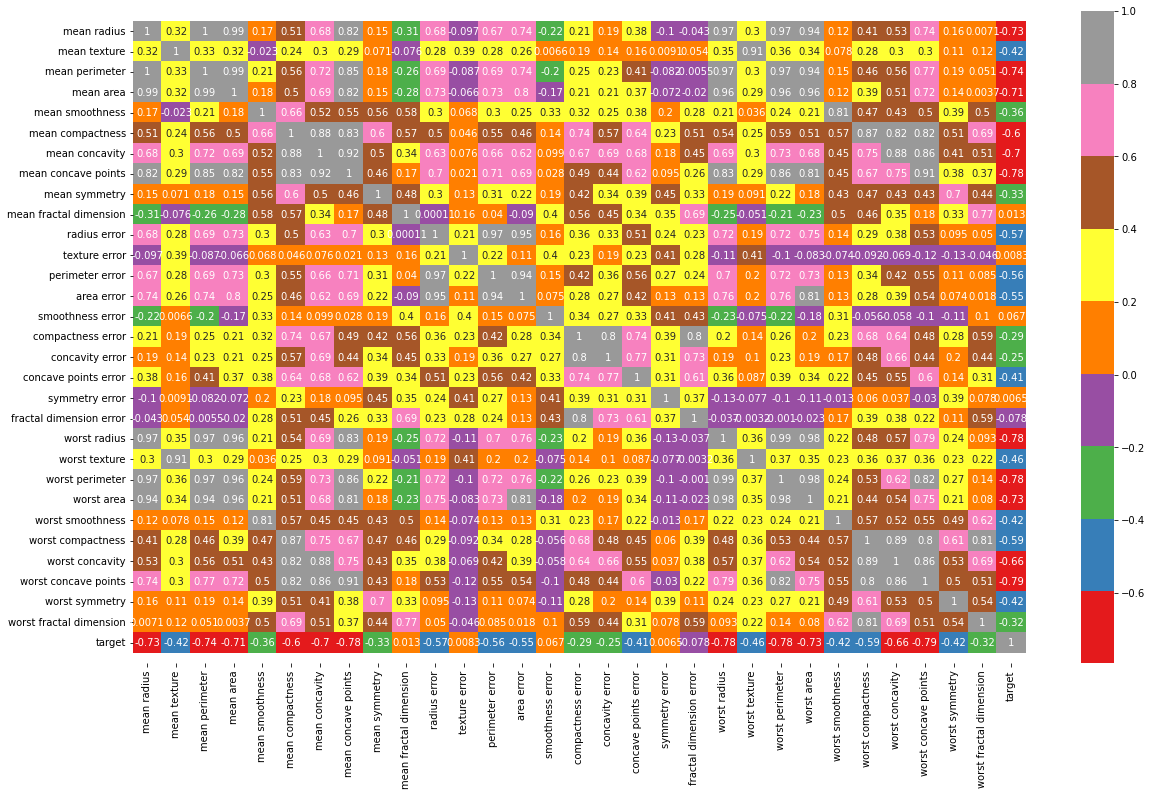

In [ ]:
corr_matirx=df.corr()
plt.figure(figsize=(20,12))
ax = sns.heatmap(corr_matirx, annot = True, cmap="Set1")
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = df.drop('target', axis=1)
y = df.target

print(f"'X' shape: {X.shape}")
print(f"'y' shape: {y.shape}")

pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

'X' shape: (569, 30)
'y' shape: (569,)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

### 2. Support Vector Machines (Kernels)
- C parameter: Controlls trade-off between classifying training points correctly and having a smooth decision boundary.
 - Small C (loose) makes cost (penalty) of misclassification low (soft margin)
 - Large C (strict) makes cost of misclassification high (hard margin), forcing   the model to explain input data stricter and potentially over it.
- gamma parameter: Controlls how far the influence of a single training set reaches.
 - Large gamma: close reach (closer data points have high weight)
 - Small gamma: far reach (more generalized solution)
- degree parameter : Degree of the polynomial kernel function ('poly'). Ignored by all other kernels.

A common approach to find the right hyperparameter values is to use grid search. It is often faster to first do a very coarse grid search, then a finer grid search around the best values found. Having a good sence of the what each hyperparameter actually does can also help you search in the right part of the hyperparameter space.

In [ ]:
from sklearn.svm import LinearSVC

model = LinearSVC(loss='hinge', dual=True)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 87.94%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.782123    0.958904  0.879397    0.870514      0.892722
recall       0.939597    0.843373  0.879397    0.891485      0.879397
f1-score     0.853659    0.897436  0.879397    0.875547      0.881047
support    149.000000  249.000000  0.879397  398.000000    398.000000
_______________________________________________
Confusion Matrix: 
 [[140   9]
 [ 39 210]]

Test Result:
Accuracy Score: 91.81%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0         1.0  accuracy   macro avg  weighted avg
precision   0.818182    1.000000  0.918129    0.909091      0.933014
recall      1.000000    0.870370  0.918129    0.935185      0.918129
f1-score    0.900000    0.930693  0.918129    0.915347      0.919385
support    63.000000  108.000000  0.918129  171.000000    171.00000

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.



## <b>Data Preparation for SVM</b>
This section lists some suggestions for how to best prepare your training data when learning an SVM model.

Numerical Inputs: SVM assumes that your inputs are numeric. If you have categorical inputs you may need to covert them to binary dummy variables (one variable for each category).
Binary Classification: Basic SVM as described in this post is intended for binary (two-class) classification problems. Although, extensions have been developed for regression and multi-class classification.

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)
print("=======================Linear Kernel SVM==========================")
model = SVC(kernel='linear')
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

print("=======================Polynomial Kernel SVM==========================")
from sklearn.svm import SVC

model = SVC(kernel='poly', degree=2, gamma='auto')
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

print("=======================Radial Kernel SVM==========================")
from sklearn.svm import SVC

model = SVC(kernel='rbf', gamma=1)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

=======================Linear Kernel SVM==========================
Train Result:
Accuracy Score: 98.99%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    1.000000    0.984190   0.98995    0.992095      0.990109
recall       0.973154    1.000000   0.98995    0.986577      0.989950
f1-score     0.986395    0.992032   0.98995    0.989213      0.989921
support    149.000000  249.000000   0.98995  398.000000    398.000000
_______________________________________________
Confusion Matrix: 
 [[145   4]
 [  0 249]]

Test Result:
Accuracy Score: 97.66%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0         1.0  accuracy   macro avg  weighted avg
precision   0.968254    0.981481  0.976608    0.974868      0.976608
recall      0.968254    0.981481  0.976608    0.974868      0.976608
f1-score    0.968254    0.981481  0.976608    0.974868      0.976608


## <b>Support Vector Machine Hyperparameter tuning</b>

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100], 
              'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001], 
              'kernel': ['rbf', 'poly', 'linear']} 

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train, y_train)

best_params = grid.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 126 candidates, totalling 630 fits
Best params: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Train Result:
Accuracy Score: 98.24%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.986301    0.980159  0.982412    0.983230      0.982458
recall       0.966443    0.991968  0.982412    0.979205      0.982412
f1-score     0.976271    0.986028  0.982412    0.981150      0.982375
support    149.000000  249.000000  0.982412  398.000000    398.000000
_______________________________________________
Confusion Matrix: 
 [[144   5]
 [  2 247]]

Test Result:
Accuracy Score: 98.25%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0         1.0  accuracy   macro avg  weighted avg
precision   0.983871    0.981651  0.982456    0.982761      0.982469
recall      0.968254    0.990741  0.982456    0.979497      0.982456
f1-score    0.976

## <b>Principal Component Analysis</b>

PCA is:

Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.
Unsupervised Machine Learning
A transformation of your data and attempts to find out what features explain the most variance in your data. For example:

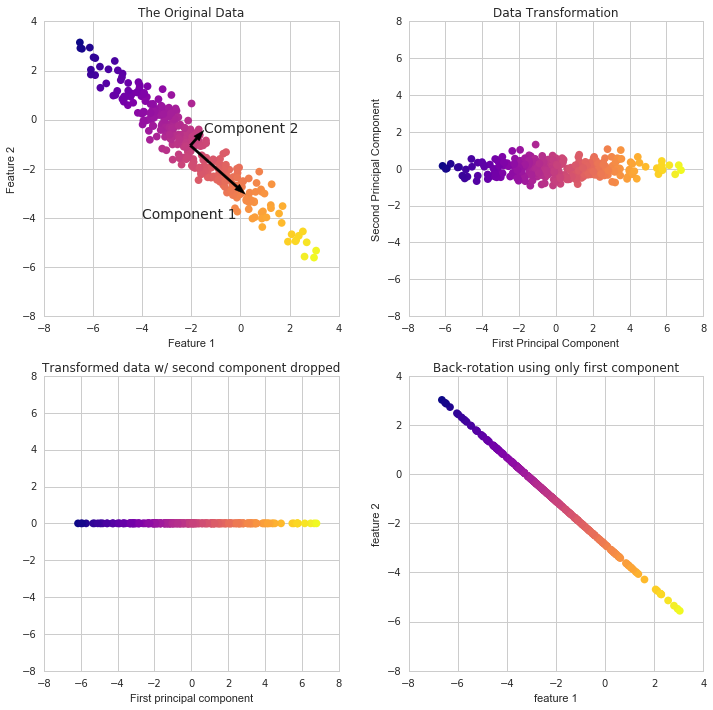

In [ ]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.decomposition import PCA

pca = PCA(n_components=3)
scaler = StandardScaler()

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.



Text(0, 0.5, 'Second Principal Component')

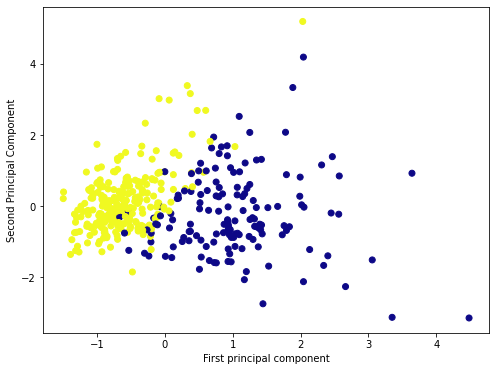

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [ ]:
param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100], 
              'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001], 
              'kernel': ['rbf', 'poly', 'linear']} 

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train, y_train)
best_params = grid.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 126 candidates, totalling 630 fits
Best params: {'C': 100, 'gamma': 1, 'kernel': 'poly'}
Train Result:
Accuracy Score: 96.48%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.978723    0.957198  0.964824    0.967961      0.965257
recall       0.926174    0.987952  0.964824    0.957063      0.964824
f1-score     0.951724    0.972332  0.964824    0.962028      0.964617
support    149.000000  249.000000  0.964824  398.000000    398.000000
_______________________________________________
Confusion Matrix: 
 [[138  11]
 [  3 246]]

Test Result:
Accuracy Score: 96.49%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0         1.0  accuracy   macro avg  weighted avg
precision   0.967213    0.963636  0.964912    0.965425      0.964954
recall      0.936508    0.981481  0.964912    0.958995      0.964912
f1-score    0.95161